<a href="https://colab.research.google.com/github/anafer25/TISE/blob/main/TISE1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini project: Solving the time independent Schrodinger equation (TISE) in 1D using finite differences.
The goal is to numerically solve the time independent equation for a particle in a **1D infinite square well** : 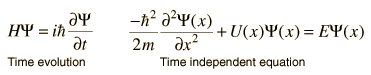

I will **assume hbar = 1 and m = 1** (for simplicity),
the domain x exists in [0, L] with psi(0) = psi(L) = 0
the grid will be the domain divided into N points (excluding the boundaries)
and central differences will give the second derivatives.


Side note: I am using AI tools to optimize workflow, debug faster, and generate clean, tested Python code. I will also use odeint() by scipy to integrate.

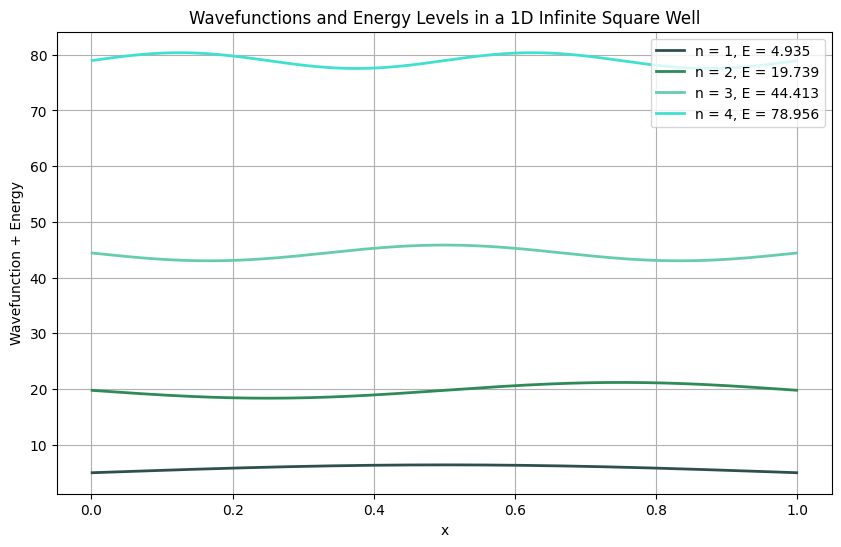

array([ 4.93479814, 19.73914386, 44.41289105, 78.95579618])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# parameters and spatial grid
L = 1.0                              # length of well (arbitrary units)
N = 1000                             # number of spatial points (except boundaries)
dx = L / N                           # grid spacing
x = np.linspace( dx, L - dx, N - 1 ) # x values excluding boundaries

# potential energy vector V(x) = 0 inside and infinity at boundaries
V = np.zeros( N - 1 ) # inside well

# kinetic energy ( finite difference method )
kinetic = -1.0 / ( 2 * dx**2 )
mainDiag = -2.0 * kinetic * np.ones( N - 1 )
offDiag = 1.0 * kinetic * np.ones( N - 2 )

# hamiltonian matrix (H = T + V)
H = mainDiag + V

# energies and wavefunctions
energies, wavefuncs = eigh_tridiagonal( H, offDiag )

# 4 first eigenstates
states = 4
colors = ['darkslategray', 'seagreen', 'mediumaquamarine', 'turquoise']
plt.figure( figsize=(10, 6) )
for n in range( states ):
  psi = wavefuncs[:, n]
  psi = np.real( psi )
  psi /= np.sqrt( np.trapezoid( psi**2, x ) )  # normalization
  plt.plot( x, psi + energies[n], color=colors[n], linewidth=2, label=f"n = {n+1}, E = {eigvals[n]:.3f}" )


# plot of the lowest energy wavefunctions and their energy levels
plt.xlabel("x")
plt.ylabel("Wavefunction + Energy")
plt.title("Wavefunctions and Energy Levels in a 1D Infinite Square Well")
plt.grid(True)
plt.legend()
plt.show()

energies[:4]

Alternatively

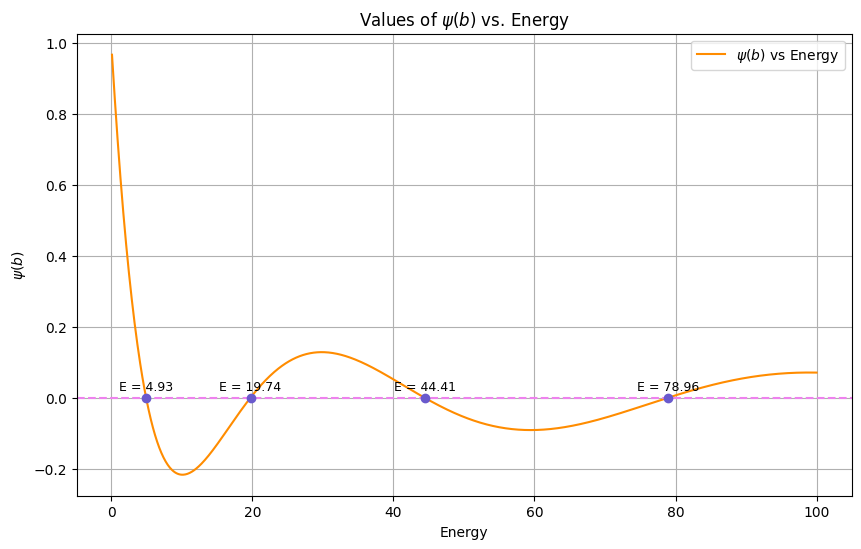

Eigenvalues found:
State 1: E=4.9348
State 2: E=19.7392
State 3: E=44.4132
State 4: E=78.9568


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import brentq

# potential: infinite square well (V=0 inside)
def V( x ):
  '''
  Potential energy function for infinite square well.
  V(x) = 0 from 0 to L and very large (10^6) outside.
  '''
  return 0 if 0 <= x <= L else 1e6

def deriv( psi, x ):
  '''
  Time independent Schrodinger equation.
  Returns the derivatives.
  State0 -> 1st derivative of wave function psi(x)
  State1 -> 2nd derivative of wave function psi(x)
  Assuming hbar = m = 1
  '''
  state0 = psi[ 1 ]
  state1 = 2.0 * ( V( x ) - E ) * psi[ 0 ]
  return np.array( [ state0, state1 ] )

# initial conditions psi(0) = 0 and psi'(0) = 1
psi0 = [ 0, 1 ]

# domain
L = 1.0 # width of well
x = np.linspace( 0, L, 1000 )

def wavefunction( energy ):
  '''
  Calculates the wavefunction for the energy E and returns
  value at point b.
  '''
  global E
  E = energy
  psi = odeint( deriv, psi0, x )
  return psi[ -1, 0 ]  # psi at b

# energy range trials
energies = np.linspace( 0.1, 100, 1000 )
psi_b = [ wavefunction( Ei ) for Ei in energies ] # store

# search zero crossings or sign change
eigenvalues = [ ]
for i in range( len( psi_b ) - 1 ):
  if psi_b[ i ] * psi_b[ i + 1 ] < 0:
    # precisely find the energy eigenvalue between the two crossing points
    E_root = brentq( wavefunction, energies[i], energies[ i + 1 ] )
    eigenvalues.append( E_root )

# plot of psi(b) vs. energy
plt.figure( figsize=( 10,6 ) )
plt.plot( energies, psi_b, color='darkorange', label=r'$\psi(b)$ vs Energy' )
plt.axhline( 0, color='violet', linestyle='--' )

# mark eigenvalues
for E_root in eigenvalues:
  plt.plot( E_root, 0, marker='o', color='slateblue' )
  plt.text( E_root, 0.02, f"E = {E_root:.2f}", ha='center', fontsize=9)

plt.xlabel( 'Energy' )
plt.ylabel( r'$\psi(b)$' )
plt.title( r'Values of $\psi(b)$ vs. Energy' )
plt.grid( True )
plt.legend( )
plt.show( )

# print the energy levels
print( "Eigenvalues found:" )
for i, E_root in enumerate( eigenvalues ):
  print( f"State {i + 1}: E={E_root:.4f}" )

